In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import preprocessing
import time
%matplotlib inline

In [2]:
industry_df = pd.read_csv('Data/movie_industry.csv', encoding='latin-1')
oscar_df = pd.read_csv('Data/the_oscar_award.csv', encoding='latin-1')
links_df = pd.read_csv('Data/movie_lense/links.csv')
tags_df = pd.read_csv('Data/movie_lense/tags.csv')
genome_scores_df = pd.read_csv('Data/movie_lense/genome-scores.csv')
movies_df = pd.read_csv('Data/movie_lense/movies.csv')
ratings_df = pd.read_csv('Data/movie_lense/ratings.csv')
genome_tags_df = pd.read_csv('Data/movie_lense/genome-tags.csv')

In [5]:
tgsdf = genome_scores_df.pivot(index='movieId',columns='tagId',values='relevance')
genome_tags_dict = dict(zip(genome_tags_df['tagId'],genome_tags_df['tag']))

In [6]:
movie_tags_df = tgsdf.rename(genome_tags_dict,axis='columns')
# movie_tags_df = movie_tags_df[movie_tags_df.index.isin(filtered_movies_list)]
thresh = 0.5
movie_tags_df[movie_tags_df<thresh] = 0
movie_tags_df[movie_tags_df>thresh] = 1
# movie_tags_df.sum()
movie_tags_df

tagId,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Explained variation per principal component: [0.1408677  0.04633386 0.03167806 0.02912098 0.02127079 0.01763919
 0.01547492 0.0148056  0.01377606 0.01286006 0.01039669 0.01014066
 0.00956741 0.00864113 0.00801098 0.00770652 0.00713526 0.00703024
 0.00646502 0.0062526 ]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
tagId,,,,,,,,,,,,,,,,,,,,
007,-4.750759,0.215494,0.151204,-0.598574,-0.065462,0.569805,0.228747,-1.067289,0.606308,-0.606329,0.178655,-0.455240,0.215151,-0.474133,0.032716,-1.070913,-1.311972,0.041449,0.182520,0.499355
007 (series),-4.857827,-0.000044,0.173735,-0.632134,0.057413,0.307466,0.246164,-0.656494,0.682165,-0.439510,0.158919,-0.184569,0.291920,-0.458949,-0.076408,-0.660298,-0.971800,-0.123038,0.224186,0.286149
18th century,-3.348130,-0.797167,-0.956300,0.008724,0.864571,0.329635,-0.129958,-1.268144,0.775561,2.040516,-2.233273,-0.187217,0.228012,0.501788,1.341899,-0.965783,0.195063,-0.552000,0.100481,-0.211857
1920s,-4.188077,-1.270823,-0.554190,-0.318668,0.308601,0.601844,0.361141,-0.864871,0.081396,0.606393,-0.291448,0.151228,-0.051451,-0.109366,0.368138,0.083981,0.148874,-0.595899,0.178039,-0.294203
1930s,0.193948,-1.236776,-2.080960,-1.266142,-0.275936,3.356739,1.054242,-4.387032,-1.089928,2.580528,-1.860456,0.364494,3.241631,-0.918576,0.769938,-0.619010,1.215582,-2.078941,0.637021,-1.603970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
writing,-4.306071,-0.965070,-0.540501,-0.440970,-0.346317,0.100211,-0.752899,0.516675,0.304358,-0.484495,-0.092863,-0.469395,0.617486,0.247955,0.605915,-0.660481,0.108223,-0.309079,0.122895,0.300103
wuxia,-4.427633,-0.333266,0.191189,-0.208994,0.333138,-0.289154,1.248192,0.059147,1.576835,0.363585,-0.640863,0.183091,-0.860471,0.007303,0.234025,-0.093961,-0.031491,-0.858917,0.005236,-0.208568
wwii,-1.934333,-1.107475,-1.709184,-2.944014,-0.157942,-1.540266,2.008965,-3.622018,-2.319676,1.814948,-1.841450,-0.415559,-2.958437,-2.865554,-0.484792,-0.985660,0.082747,1.438410,-3.023762,2.905996


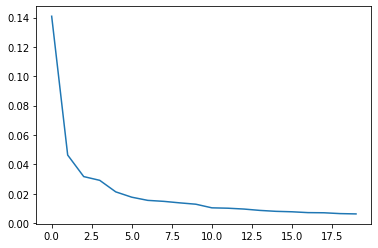

In [7]:
movie_tags_dfT = movie_tags_df.T
pca2 = PCA(n_components = 20)
pca2_results = pca2.fit_transform(movie_tags_dfT)
print('Explained variation per principal component: {}'.format(pca2.explained_variance_ratio_))
plt.plot(np.arange(0,len(pca2.explained_variance_ratio_)),pca2.explained_variance_ratio_)
plt.yscale('linear')
movie_PCA_dfT = pd.DataFrame(data =pca2_results, index = movie_tags_dfT.index)
movie_PCA_dfT

In [8]:
tsne2 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1200)
# tsne_df = small_movie_PCA_df
tsne_df2 = movie_PCA_dfT
tsne_results2 = tsne2.fit_transform(tsne_df2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1128 samples in 0.004s...
[t-SNE] Computed neighbors for 1128 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1128
[t-SNE] Computed conditional probabilities for sample 1128 / 1128
[t-SNE] Mean sigma: 0.539785
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.366768
[t-SNE] KL divergence after 1200 iterations: 0.995084


Index([&#39;money&#39;, &#39;grindhouse&#39;, &#39;excellent&#39;, &#39;global warming&#39;,
       &#39;comic book adaption&#39;, &#39;marx brothers&#39;, &#39;android(s)/cyborg(s)&#39;,
       &#39;jane austen&#39;, &#39;love&#39;, &#39;surreal&#39;, &#39;wistful&#39;, &#39;pg&#39;, &#39;virus&#39;, &#39;paris&#39;,
       &#39;psychiatry&#39;, &#39;mockumentary&#39;, &#39;complex&#39;, &#39;prison escape&#39;, &#39;strippers&#39;,
       &#39;iran&#39;, &#39;jews&#39;, &#39;sequels&#39;, &#39;dark comedy&#39;, &#39;intelligent&#39;, &#39;chick flick&#39;,
       &#39;nazi&#39;, &#39;german&#39;, &#39;girlie movie&#39;, &#39;foreign&#39;, &#39;disturbing&#39;, &#39;hong kong&#39;,
       &#39;carrie-anne moss&#39;, &#39;sports&#39;, &#39;runaway&#39;, &#39;idiotic&#39;, &#39;notable nudity&#39;,
       &#39;mountain climbing&#39;, &#39;world politics&#39;, &#39;dark hero&#39;, &#39;photography&#39;,
       &#39;tarantino&#39;, &#39;dystopia&#39;, &#39;vietnam&#39;, &#39;disney animat

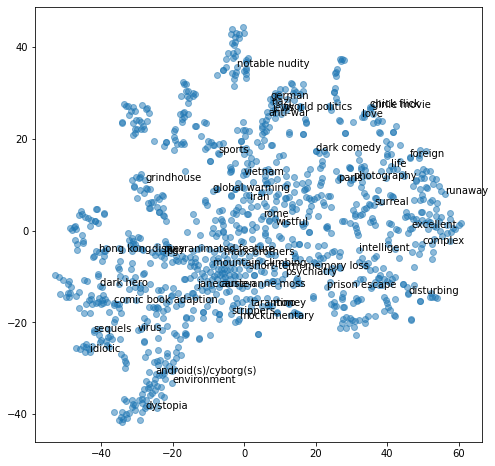

In [12]:
nrand = 50
seed=2
tags = tsne_df2.sample(nrand,random_state=seed).index
locs = [tsne_df2.index.get_loc(i) for i in tags]
print(tags,locs)

plt.figure(figsize=(8,8))
plt.scatter(tsne_results2[:,0], tsne_results2[:,1],alpha=0.5, edgecolors=None)
for t,x,y in zip(tags,tsne_results2[locs,0],tsne_results2[locs,1]):
    plt.annotate(t,(x,y))

In [35]:
def load_evolution_df(filename):
    evolution_df = pd.read_csv(filename)
    # Clean
    evolution_df.rename({'Unnamed: 0':'Epoch','Unnamed: 1':'userId'},axis='columns',inplace=True)
    evolution_df['userId'] = [int(s.split('_')[1]) for s in evolution_df['userId'].values]
    evolution_df['Epoch'] = [int(s.split('_')[1]) for s in evolution_df['Epoch'].values]
    return evolution_df

In [36]:
evolution_df = load_evolution_df('Data/evolution_40epochs_100users_sim_1000users_total_100mov.csv')
evolution_df['Epoch'].max()
evolution_df

,Epoch,userId,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_91,top_92,top_93,top_94,top_95,top_96,top_97,top_98,top_99,top_100
0,0,128088,913,6016,908,3030,919,1203,55290,260,...,54286,49530,454,50685,1148,2918,3252,2731,2249,4144
1,0,267455,858,1276,1203,912,904,900,908,1201,...,1175,1208,1298,319,1212,2692,665,1230,5013,49530
2,0,73381,1203,2959,1193,1276,1200,5618,541,904,...,1266,4027,933,48516,29,1199,3730,58559,2324,1247
3,0,117628,1276,912,2959,2019,858,2324,1203,2858,...,60069,1245,1446,1089,31410,933,1256,900,935,750
4,0,21453,1148,1203,5618,1237,541,1172,50,527,...,5971,1953,778,1797,1304,38061,1175,4144,7327,1259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,39,182815,76293,108192,82169,3260,5140,64116,1484,59392,...,7562,2442,27020,7306,7307,168326,1684,59985,8362,5516
3996,39,254394,76293,108192,3260,1484,1912,99996,59392,5140,...,4664,7307,7891,110781,4844,7383,140267,165603,32291,1807
3997,39,269446,1271,115664,3182,88118,166635,95105,62956,5284,...,2267,7448,93980,157699,79588,163937,72294,25929,3118,8833
3998,39,146366,3260,89840,76293,59392,60803,82169,3845,49220,...,3933,93980,97172,1798,482,27618,135534,26819,62956,140267


In [37]:
# evolution_df = pd.read_csv('Data/evolution_10_epochs.csv')
# # Clean
# evolution_df.rename({'Unnamed: 0':'Epoch','Unnamed: 1':'userId'},axis='columns',inplace=True)
# evolution_df['userId'] = [int(s.split('_')[1]) for s in evolution_df['userId'].values]
# evolution_df['Epoch'] = [int(s.split('_')[1]) for s in evolution_df['Epoch'].values]
# evolution_df

In [44]:
def get_user_recommended_diversity(userID,epoch):
    tdf = evolution_df[(evolution_df['Epoch']==epoch) & (evolution_df['userId']==userID)]
    movies_list = tdf.drop(labels=['Epoch','userId'],axis=1).values[0]
    # convert to list of indices into distance matrix
    movies_list_idx = [movie_tags_df.index.get_loc(i) for i in movies_list]
    return compute_average_diversity(movies_list_idx)

def compute_average_diversity(movies_list_idx):
    tot_dist = 0
    count = 0
    for i in itertools.combinations(movies_list_idx,2):
        count += 1 
        x,y = i
        d = dist[x,y]
        tot_dist+=d
    return tot_dist/count

def get_user_recommended_movies(userID,epoch):
    tdf = evolution_df[(evolution_df['Epoch']==epoch) & (evolution_df['userId']==userID)]
    movies_list = tdf.drop(labels=['Epoch','userId'],axis=1).values[0]
    return movies_list

def get_user_recommended_tag_density(userID,epoch,tag_thresh=0,prob_norm=True):
    movies = get_user_recommended_movies(userID,epoch=epoch)
    tdf = movie_tags_df[movie_tags_df.index.isin(movies)]
    tdf[tdf<tag_thresh] = 0
    tag_totals = tdf.mean(axis=0)
    overall_totals = movie_tags_df.mean(axis=0)
    relative_totals = tag_totals/overall_totals
    tag_totals = relative_totals
    normed = (tag_totals - tag_totals.min())/(tag_totals.max() - tag_totals.min())
    tag_totals_sum = tag_totals.sum()
    if prob_norm:
        return np.array([i/tag_totals_sum for i in tag_totals])
    else:
        return normed

# get_user_recommended_tag_density(195895,0)

In [40]:
# get_user_recommended_movies(45982,0)

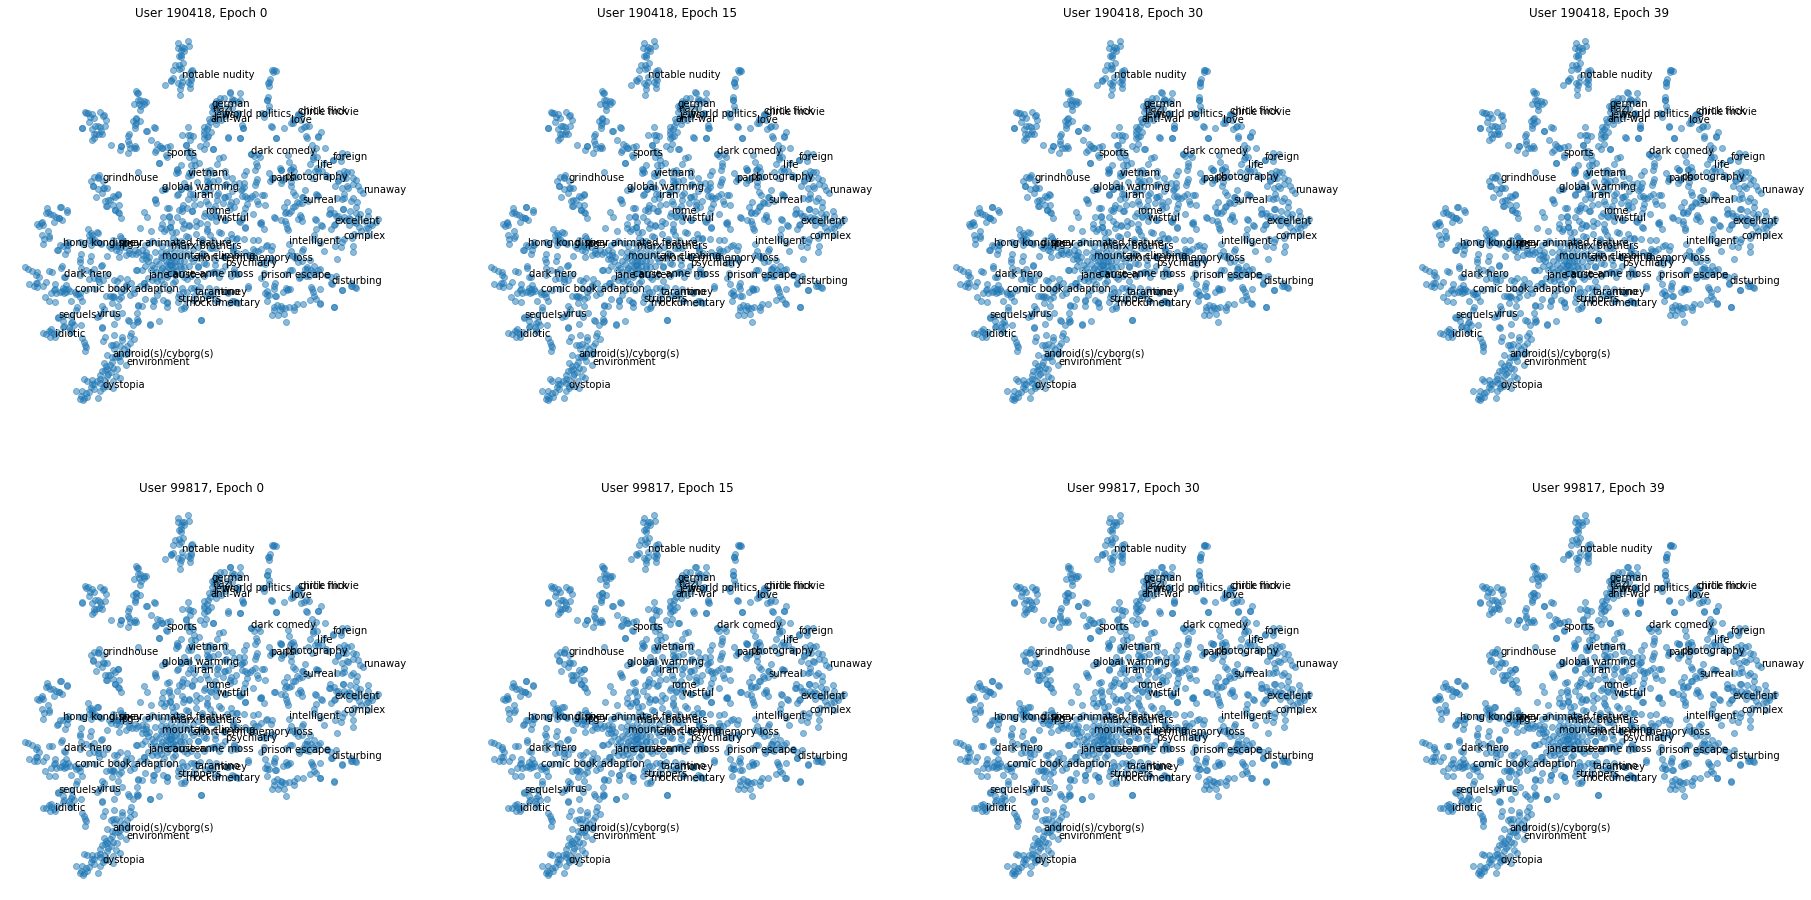

In [46]:
nrand = 50
seed = 2
tags = tsne_df2.sample(nrand,random_state=seed).index
locs = [tsne_df2.index.get_loc(i) for i in tags]
unique_users = evolution_df.userId.unique()
Nusers=2
users = np.random.choice(unique_users, Nusers, replace=False)
np.random.seed(seed=seed)
# print(users)

Size = 5e3
tag_thresh = 0
# epochs = [0,3,6,9]
epochs = [0,15,30,39]
fig, axs = plt.subplots(len(users), len(epochs),figsize=(32,16))
for i,user in enumerate(users):
    for j,epoch in enumerate(epochs):
        axs[i,j].scatter(tsne_results2[:,0], tsne_results2[:,1],alpha=0.5, edgecolors=None)
        tag_totals = get_user_recommended_tag_density(user,epoch=epoch,tag_thresh=tag_thresh,prob_norm=True)
        # print(tag_totals)
        axs[i,j].scatter(tsne_results2[:,0], tsne_results2[:,1], alpha=0.5, color='red',s=Size*tag_totals,edgecolors=None)
        for t,x,y in zip(tags,tsne_results2[locs,0],tsne_results2[locs,1]):
            axs[i,j].annotate(t,(x,y))

        axs[i,j].axis('off')
        axs[i,j].set_title('User {}, Epoch {}'.format(user,epoch))
plt.show()